### Data frame extret de https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

df=pd.read_csv('athlete_events.csv')

df.tail(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


# Exercici 1

In [2]:
df=pd.read_csv('athlete_events.csv')
df = pd.concat([df, pd.get_dummies(df['Medal'].dropna())],axis=1)
df = pd.concat([df, pd.get_dummies(df['Season'].dropna())],axis=1)
df = pd.concat([df, pd.get_dummies(df['Sport'].dropna())],axis=1)
df['Medalles'] = df[['Gold', 'Silver', 'Bronze']].sum(axis=1)

df['Medal'] = df['Medal'].fillna(0)

df.iloc[:5,1:15]
#df.columns

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [3]:
edat = StandardScaler()
edat_escalada = edat.fit_transform(np.array(df['Age'].dropna()).reshape(-1, 1))
print('mitja:',edat_escalada.mean(), 'desviació estàndard:',edat_escalada.std(),'aproximadament 0 i 1')

peso = StandardScaler()
peso_escalado = peso.fit_transform(np.array(df['Weight'].dropna()).reshape(-1, 1))
print('mitja:',peso_escalado.mean(),'desviació estàndard:',peso_escalado.std(), 'aprox 0 i 1')

alçada = StandardScaler()
alçada_escalada = alçada.fit_transform(np.array(df['Height'].dropna()).reshape(-1, 1))
print('mitja:',alçada_escalada.mean(),'desviació estàndard:',alçada_escalada.std(), 'aprox 0 i 1')

año = StandardScaler()
año_escalado = año.fit_transform(np.array(df['Year'].dropna()).reshape(-1, 1))
print('mitja:',año_escalado.mean(),'desviació estàndard:',año_escalado.std(), 'aprox 0 i 1')

mitja: 2.6679095237413046e-16 desviació estàndard: 1.0 aproximadament 0 i 1
mitja: 4.134121420118696e-16 desviació estàndard: 0.9999999999999999 aprox 0 i 1
mitja: -5.497194741569999e-16 desviació estàndard: 0.9999999999999999 aprox 0 i 1
mitja: -1.1529454562459732e-15 desviació estàndard: 1.0000000000000002 aprox 0 i 1


# Exercici 2

In [4]:
df2=df.groupby('ID').agg({'Sex':'last','Name':'last','Height' : 'last','Weight':'last','Age':'last', 'Bronze':'sum', 'Gold':'sum',
       'Silver':'sum', 'Medalles':'sum', 'Aeronautics':'sum', 'Alpine Skiing':'sum',
       'Alpinism':'sum', 'Archery':'sum', 'Art Competitions':'sum', 'Athletics':'sum', 'Badminton':'sum',
       'Baseball':'sum', 'Basketball':'sum', 'Basque Pelota':'sum', 'Beach Volleyball':'sum',
       'Biathlon':'sum', 'Bobsleigh':'sum', 'Boxing':'sum', 'Canoeing':'sum', 'Cricket':'sum', 'Croquet':'sum',
       'Cross Country Skiing':'sum', 'Curling':'sum', 'Cycling':'sum', 'Diving':'sum', 'Equestrianism':'sum',
       'Fencing':'sum', 'Figure Skating':'sum', 'Football':'sum', 'Freestyle Skiing':'sum', 'Golf':'sum',
       'Gymnastics':'sum', 'Handball':'sum', 'Hockey':'sum', 'Ice Hockey':'sum', 'Jeu De Paume':'sum',
       'Judo':'sum', 'Lacrosse':'sum', 'Luge':'sum', 'Military Ski Patrol':'sum', 'Modern Pentathlon':'sum',
       'Motorboating':'sum', 'Nordic Combined':'sum', 'Polo':'sum', 'Racquets':'sum',
       'Rhythmic Gymnastics':'sum', 'Roque':'sum', 'Rowing':'sum', 'Rugby':'sum', 'Rugby Sevens':'sum',
       'Sailing':'sum', 'Shooting':'sum', 'Short Track Speed Skating':'sum', 'Skeleton':'sum',
       'Ski Jumping':'sum', 'Snowboarding':'sum', 'Softball':'sum', 'Speed Skating':'sum', 'Swimming':'sum',
       'Synchronized Swimming':'sum', 'Table Tennis':'sum', 'Taekwondo':'sum', 'Tennis':'sum',
       'Trampolining':'sum', 'Triathlon':'sum', 'Tug-Of-War':'sum', 'Volleyball':'sum', 'Water Polo':'sum',
       'Weightlifting':'sum', 'Wrestling':'sum'}).dropna()

In [5]:
df2_normalitzat = StandardScaler().fit_transform(df2.iloc[:,2:])

In [6]:
len(df2)

99088

In [7]:
df2_normalitzat

array([[ 0.34983052,  0.55247329, -0.35798951, ..., -0.11519621,
        -0.13068177, -0.1669453 ],
       [-0.61300239, -0.82181771, -0.53993037, ..., -0.11519621,
        -0.13068177, -0.1669453 ],
       [ 0.83124698,  0.68990239,  0.18783308, ..., -0.11519621,
        -0.13068177, -0.1669453 ],
       ...,
       [ 0.25354723,  1.17090424,  0.55171481, ..., -0.11519621,
        -0.13068177, -0.1669453 ],
       [-0.03530264, -0.89053226,  0.18783308, ..., -0.11519621,
        -0.13068177, -0.1669453 ],
       [ 0.83124698,  1.65190609,  1.46141913, ..., -0.11519621,
        -0.13068177, -0.1669453 ]])

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df2_normalitzat)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [9]:
principalDf

,principal component 1,principal component 2
0,-0.309071,-1.414330
1,-1.086558,0.592929
2,0.125464,-0.642417
3,0.443397,-0.452538
4,0.309637,-0.058314
...,...,...
99083,0.024389,-1.298181
99084,-0.279900,-0.733594
99085,-0.226357,-1.205493
99086,-0.764071,0.437540


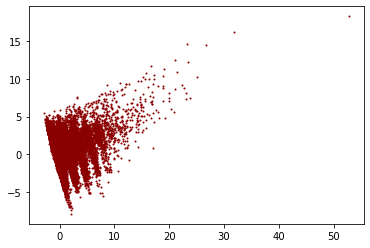

In [10]:
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],s=1,c='darkred',marker='o')

In [11]:
finalDf = pd.concat([principalDf, df2['Sex']], axis=1)

In [12]:
finalDf

,principal component 1,principal component 2,Sex
0,-0.309071,-1.414330,NaN
1,-1.086558,0.592929,M
2,0.125464,-0.642417,M
3,0.443397,-0.452538,NaN
4,0.309637,-0.058314,NaN
...,...,...,...
135567,NaN,NaN,M
135568,NaN,NaN,F
135569,NaN,NaN,M
135570,NaN,NaN,M


In [13]:
len(finalDf)

126024

In [14]:
final = finalDf.groupby('Sex')
print(final)

Text(0, 0.5, 'principal component 2')

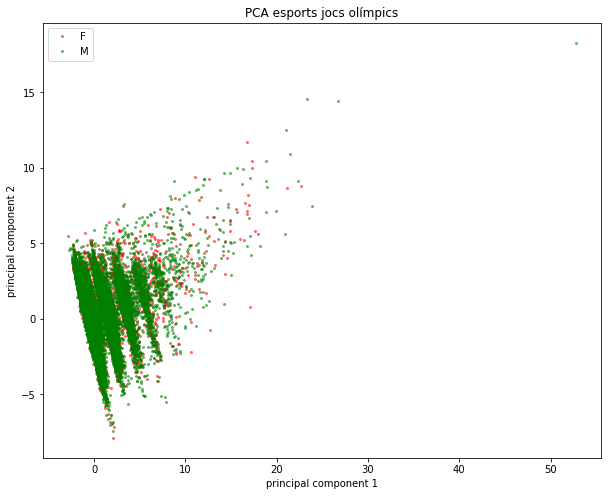

In [15]:
plt.rcParams["figure.figsize"] = (10,8)
colors = ['r', 'g']
i=0
for sex, group in final:
    plt.plot(group['principal component 1'], group['principal component 2'], marker='o', linestyle='', markersize=2, label=sex, color=colors[i], alpha=0.5)
    i+=1

plt.legend()
plt.title("PCA esports jocs olímpics", loc="center")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

In [16]:
pca.explained_variance_ratio_

array([0.04091689, 0.03289159])

# Exercici 3
Normalització tenint en compte els outliers

,Sex,Name,Height,Weight,Age,Bronze,Gold,Silver,Medalles,Aeronautics,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
ID,,,,,,,,,,,,,,,,,,,,,
94406,M,"Michael Fred Phelps, II",193.0,91.0,31.0,2.0,23.0,3.0,28.0,0,...,0,0,0,0,0,0,0,0,0,0


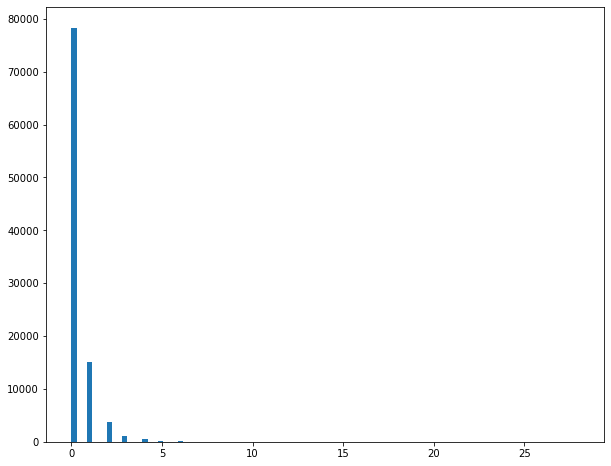

In [17]:
plt.hist(df2['Medalles'],bins=100)
outliers_medalles = np.array(df2.loc[(df2['Medalles']>20)].reset_index()['ID'])
df2.loc[(df2['Medalles']>20)]

#Outliers: tindre més de 20 medalles en els jocs olímpics, perquè és poc probable.

In [18]:
df2.drop(outliers_medalles,axis=0,inplace=True)
df2.loc[(df2['Medalles']>10)]

,Sex,Name,Height,Weight,Age,Bronze,Gold,Silver,Medalles,Aeronautics,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
ID,,,,,,,,,,,,,,,,,,,,,
4198,M,Nikolay Yefimovich Andrianov,166.0,60.0,27.0,3.0,7.0,5.0,15.0,0,...,0,0,0,0,0,0,0,0,0,0
11642,M,"Matthew Nicholas ""Matt"" Biondi",200.0,95.0,26.0,1.0,8.0,2.0,11.0,0,...,0,0,0,0,0,0,0,0,0,0
11951,M,Ole Einar Bjrndalen,178.0,65.0,40.0,1.0,8.0,4.0,13.0,0,...,0,0,0,0,0,0,0,0,0,0
18826,F,Vra slavsk (-Odloilov),160.0,58.0,26.0,0.0,7.0,4.0,11.0,0,...,0,0,0,0,0,0,0,0,0,0
23426,F,Natalie Anne Coughlin (-Hall),173.0,63.0,29.0,5.0,3.0,4.0,12.0,0,...,0,0,0,0,0,0,0,0,0,0
35550,F,Birgit Fischer-Schmidt,172.0,69.0,42.0,0.0,8.0,4.0,12.0,0,...,0,0,0,0,0,0,0,0,0,0
57998,M,Sawao Kato,163.0,59.0,29.0,1.0,8.0,3.0,12.0,0,...,0,0,0,0,0,0,0,0,0,0
67046,F,Larysa Semenivna Latynina (Diriy-),161.0,52.0,29.0,4.0,9.0,5.0,18.0,0,...,0,0,0,0,0,0,0,0,0,0
70965,M,Ryan Steven Lochte,188.0,88.0,32.0,3.0,6.0,3.0,12.0,0,...,0,0,0,0,0,0,0,0,0,0


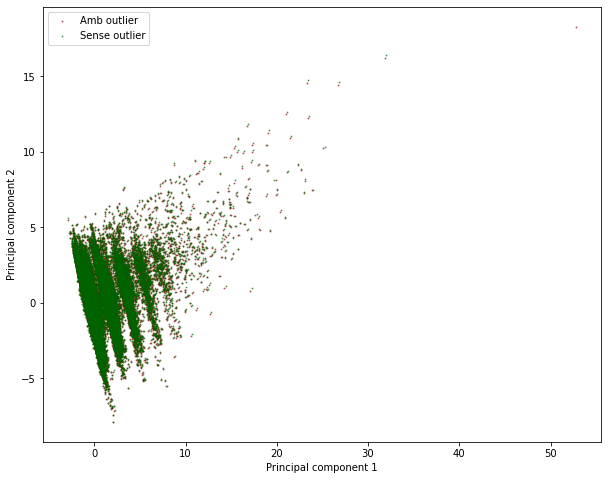

In [19]:
df2_sense_outliers_normalitzat = StandardScaler().fit_transform(df2.iloc[:,2:])
principalComponents = pca.fit_transform(df2_sense_outliers_normalitzat)
principalDf_sense_outliers = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],s=1,c='darkred',marker='o', alpha=0.5)
plt.scatter(principalDf_sense_outliers['principal component 1'],principalDf_sense_outliers['principal component 2'],s=1,c='darkgreen',marker='o',alpha=0.5)

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(['Amb outlier','Sense outlier'])

El punt de PC1 > 50 i PC2 > 15 era Michael Fred Phelps, II

,Sex,Name,Height,Weight,Age,Bronze,Gold,Silver,Medalles,Aeronautics,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
ID,,,,,,,,,,,,,,,,,,,,,
9407,M,Gunther Behnke,221.0,114.0,29.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
16639,M,Tommy Loren Burleson,223.0,102.0,20.0,0.0,0.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
30409,M,Roberto Dueas Hernndez,221.0,137.0,28.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
104059,M,Arvydas Romas Sabonis,223.0,122.0,31.0,2.0,1.0,0.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
132627,M,Yao Ming,226.0,141.0,27.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
134621,M,Zhang Zhaoxu,221.0,110.0,24.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


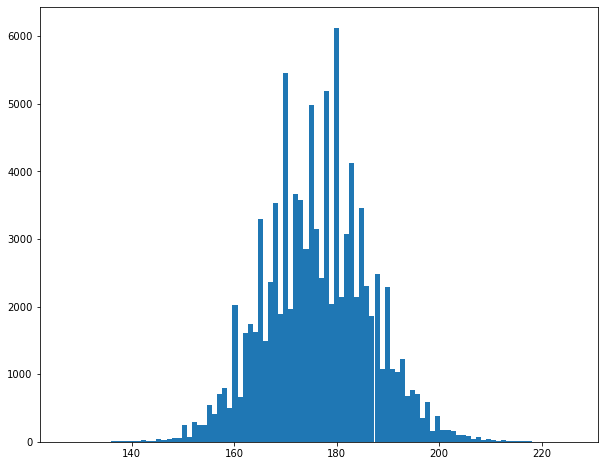

In [20]:
plt.hist(df2['Height'],bins=100)
outliers_alçada = np.array(df2.loc[(df2['Height']>220)].reset_index()['ID'])
df2.loc[(df2['Height']>220)]

#Outliers: tindre més de 220cm d'alçada

In [21]:
df2.drop(outliers_alçada,axis=0,inplace=True)
df2.loc[(df2['Height']>220)]

,Sex,Name,Height,Weight,Age,Bronze,Gold,Silver,Medalles,Aeronautics,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
ID,,,,,,,,,,,,,,,,,,,,,


,Sex,Name,Height,Weight,Age,Bronze,Gold,Silver,Medalles,Aeronautics,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
ID,,,,,,,,,,,,,,,,,,,,,
12177,M,"Ricardo Blas, Jr.",183.0,214.0,25.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


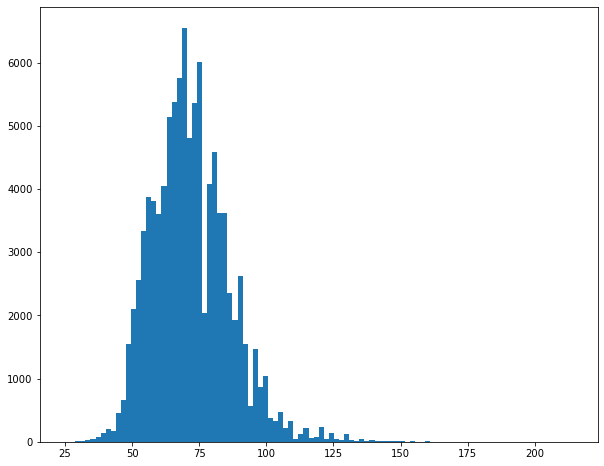

In [22]:
plt.hist(df2['Weight'],bins=100)
outliers_pes = np.array(df2.loc[(df2['Weight']>200)].reset_index()['ID'])
df2.loc[(df2['Weight']>200)]

#Outliers: pesar més de 200kg

In [23]:
df2.drop(outliers_pes,axis=0,inplace=True)
df2.loc[(df2['Weight']>200)]

,Sex,Name,Height,Weight,Age,Bronze,Gold,Silver,Medalles,Aeronautics,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
ID,,,,,,,,,,,,,,,,,,,,,


,Sex,Name,Height,Weight,Age,Bronze,Gold,Silver,Medalles,Aeronautics,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
ID,,,,,,,,,,,,,,,,,,,,,
49287,M,Hiroshi Hoketsu,168.0,62.0,71.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


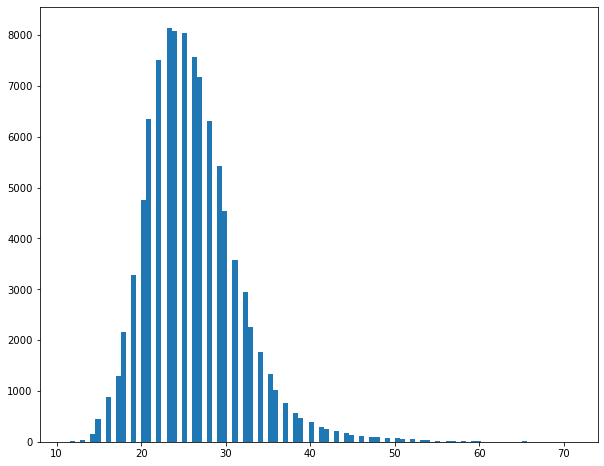

In [24]:
plt.hist(df2['Age'],bins=100)
outliers_edat = np.array(df2.loc[(df2['Age']>70)].reset_index()['ID'])
df2.loc[(df2['Age']>70)]

#Outliers: tindre més de 70 anys

In [25]:
df2.drop(outliers_edat,axis=0,inplace=True)
df2.loc[(df2['Age']>70)]

,Sex,Name,Height,Weight,Age,Bronze,Gold,Silver,Medalles,Aeronautics,...,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
ID,,,,,,,,,,,,,,,,,,,,,


In [26]:
df2_sense_outliers_normalitzat = StandardScaler().fit_transform(df2.iloc[:,2:])

In [27]:
df2_sense_outliers_normalitzat

array([[ 0.35031416,  0.55323517, -0.35800483, ..., -0.11520151,
        -0.13068781, -0.16695309],
       [-0.61306922, -0.82218207, -0.5400023 , ..., -0.11520151,
        -0.13068781, -0.16695309],
       [ 0.83200585,  0.6907769 ,  0.18798757, ..., -0.11520151,
        -0.13068781, -0.16695309],
       ...,
       [ 0.25397582,  1.17217293,  0.55198251, ..., -0.11520151,
        -0.13068781, -0.16695309],
       [-0.03503919, -0.89095293,  0.18798757, ..., -0.11520151,
        -0.13068781, -0.16695309],
       [ 0.83200585,  1.65356896,  1.46196985, ..., -0.11520151,
        -0.13068781, -0.16695309]])

In [28]:
principalComponents = pca.fit_transform(df2_sense_outliers_normalitzat)
principalDf_sense_outliers = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [29]:
principalDf_sense_outliers

,principal component 1,principal component 2
0,-0.310745,-1.407285
1,-1.087847,0.575691
2,0.123766,-0.657256
3,0.436327,-0.553943
4,0.302181,-0.159294
...,...,...
99074,0.031806,-1.302613
99075,-0.278730,-0.723848
99076,-0.222237,-1.211529
99077,-0.767874,0.426521


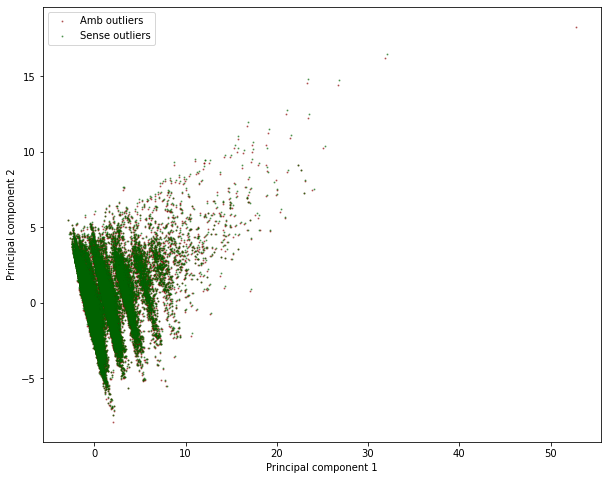

In [30]:
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],s=1,c='darkred',marker='o', alpha=0.5)
plt.scatter(principalDf_sense_outliers['principal component 1'],principalDf_sense_outliers['principal component 2'],s=1,c='darkgreen',marker='o',alpha=0.5)

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(['Amb outliers','Sense outliers'])

Es pot veure que hi ha una mica de diferència entre el PCA original amb outliers i el PCA sense outliers.